In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations

import ast
import re

pd.options.display.float_format = '{:.0f}'.format
np.set_printoptions(suppress=True)

In [86]:
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [87]:
retweets = tweets.dropna(subset=['retweeted_status_id'])

In [88]:
retweets = retweets.merge(
    tweets[['tweet_id', 'user_id']],
    left_on='retweeted_status_id',
    right_on='tweet_id',
    how='inner',
    suffixes=('', '_original')
)


In [89]:
retweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_id_original,user_id_original
0,4208754922,missourinewsus,1472251419000,2016-08-26 22:43:39,0,False,0,RT @Pamela_Moore13: People starting to wake up...,769304327345303552,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Miami""]",[],POSTED,"[""pamela_moore13""]",769300010093666304,NaN,769300010093666304,4272870988
1,4311371968,rightnpr,1473278309000,2016-09-07 19:58:29,0,False,0,RT @tpartynews: 💥💥💥Trump raises $5 mil in smal...,773611416347611136,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""tpartynews""]",773604250635079680,NaN,773604250635079680,3990577513
2,3990577513,tpartynews,1474066747000,2016-09-16 22:59:07,0,False,0,"RT @TEN_GOP: Trump in #Miami: ""Take Guns from ...",776918367022317568,"<a href=""https://about.twitter.com/products/tw...","[""Miami"",""TrumpRally"",""birtherism""]",[],POSTED,"[""ten_gop""]",776917554996674560,NaN,776917554996674560,4224729994
3,1690487623,michellearry,1455878644000,2016-02-19 10:44:04,NaN,NaN,NaN,"RT @jstines3: TED CRUZ: CONSTITUTION as law, S...",700631933680635904,NaN,[],[],POSTED,[],702779475369422848,NaN,702779475369422848,1710804738
4,2532611755,kathiemrr,1487175024000,2017-02-15 16:10:24,NaN,NaN,NaN,RT @8Flibble: #HowToLoseYourJob\r\nGet drunk a...,831898462878912512,NaN,[],[],POSTED,[],831895814976987136,NaN,831895814976987136,2496599688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,1623180199,jeffreykahunas,1471621929000,2016-08-19 15:52:09,0,False,0,RT @MarissaImStrong: She lies everytime! I'm s...,766664055289372672,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""ReleaseClintonsMedicalRecords"",""CrookedHilla...","[""https://twitter.com/PeteFleck/status/7666561...",POSTED,"[""marissaimstrong""]",766663515004362752,NaN,766663515004362752,1681425248
2624,3312143142,gloed_up,1473001963000,2016-09-04 15:12:43,0,False,0,RT @BleepThePolice: She would be exellent POTU...,772452337012973568,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HappyBirthdayBeyonce"",""BeyonceForPresident""]","[""https://twitter.com/gloed_up/status/77243927...",POSTED,"[""bleepthepolice""]",772443961549926400,NaN,772443961549926400,1687183549
2625,2589353987,cassieweltch,1471448496000,2016-08-17 15:41:36,0,False,0,RT @DanaGeezus: #TrumpsFavoriteHeadline Obama ...,765936623724929024,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpsFavoriteHeadline""]",[],POSTED,"[""danageezus""]",765927730114359296,NaN,765927730114359296,2882037326
2626,2589353987,cassieweltch,1469892276000,2016-07-30 15:24:36,NaN,NaN,NaN,RT @HeyHeyMissJ: #IHatePokemonGoBecause I like...,759409364134424576,NaN,"[""IHatePokemonGoBecause""]",[],POSTED,[],759415818664943616,NaN,759415818664943616,2533001646


In [90]:
import networkx as nx

G = nx.DiGraph()
edges = retweets[['user_id', 'user_id_original']].values
G.add_edges_from(edges)


In [91]:
G.nodes

NodeView((np.float64(4208754922.0), np.float64(4272870988.0), np.float64(4311371968.0), np.float64(3990577513.0), np.float64(4224729994.0), np.float64(1690487623.0), np.float64(1710804738.0), np.float64(2532611755.0), np.float64(2496599688.0), np.float64(2620869737.0), np.float64(2533001646.0), np.float64(2541945841.0), np.float64(1727482238.0), np.float64(2589353987.0), np.float64(1679279490.0), np.float64(4224912857.0), np.float64(2573225349.0), np.float64(2882013788.0), np.float64(2584152521.0), np.float64(2572058134.0), np.float64(1623180199.0), np.float64(1671234620.0), np.float64(2587100717.0), np.float64(1833223908.0), np.float64(2882350436.0), np.float64(4332740714.0), np.float64(3312143142.0), np.float64(2536146374.0), np.float64(1676481360.0), np.float64(1657694515.0), np.float64(1650310652.0), np.float64(1649967228.0), np.float64(2671070290.0), np.float64(2533221819.0), np.float64(4355797094.0), np.float64(4840551713.0), np.float64(2531159968.0), np.float64(1660771422.0), np

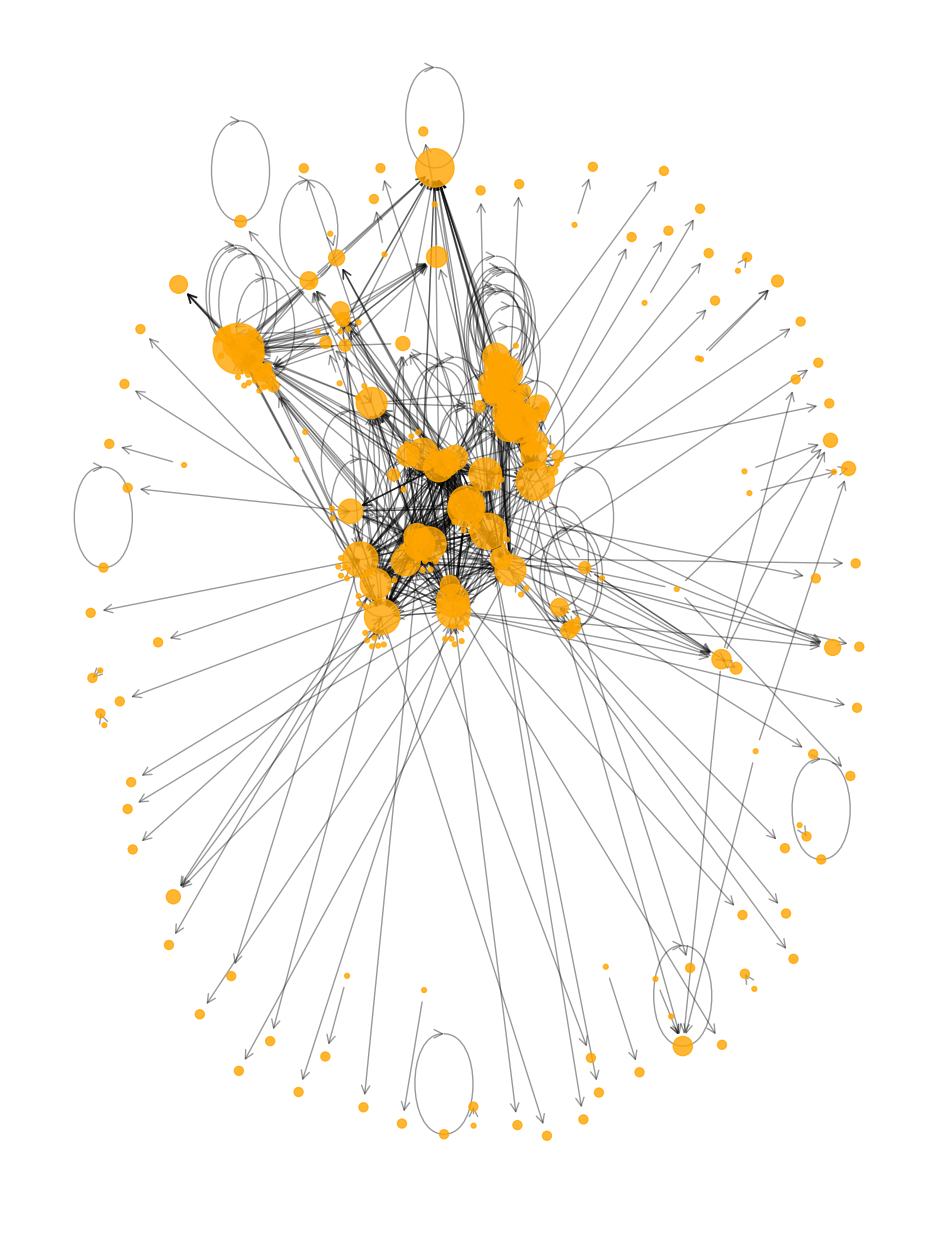

In [92]:
degrees = dict(G.in_degree())
node_sizes = [(degrees[n]+0.4) * 30 for n in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 16))
pos = nx.spring_layout(G, seed=42)

# nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color='orange',
    alpha=0.8
)

# edges + strzałki
nx.draw_networkx_edges(
    G,
    pos,
    arrows=True,
    arrowstyle='->',
    arrowsize=15,
    alpha=0.4
)

plt.axis('off')
plt.show()


In [93]:
import community as community_louvain

G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected , random_state= 42, resolution=0.1)

In [94]:
communities_df = (
    pd.DataFrame.from_dict(partition, orient='index', columns=['community'])
      .reset_index()
      .rename(columns={'index': 'user_id'})
)


In [95]:
communities_df

,user_id,community
0,4208754922,1
1,4272870988,23
2,4311371968,34
3,3990577513,34
4,4224729994,4
...,...,...
262,NaN,3
263,NaN,9
264,NaN,9
265,NaN,56


In [96]:
communities_df
top3_comm = communities_df.groupby(['community']).count().sort_values(by = 'user_id', ascending= False)[:3]

In [97]:
nodes_top = (
    communities_df
    .loc[communities_df['community'].isin(top3_comm.index), 'user_id']
    .dropna()
    .tolist()
)
nodes_top_series = pd.Series(nodes_top)

nodes_top_series.name = 'user_id'
nodes_top_series.head()

0   4272870988
1   4224729994
2   2532611755
3   2496599688
4   2533001646
Name: user_id, dtype: float64

In [98]:
merged_df = pd.merge(left=nodes_top_series.to_frame(), right=communities_df, how='inner')

merged_df


,user_id,community
0,4272870988,23
1,4224729994,4
2,2532611755,8
3,2496599688,8
4,2533001646,8
5,2541945841,8
6,1727482238,8
7,2589353987,8
8,2882013788,8
9,2584152521,8


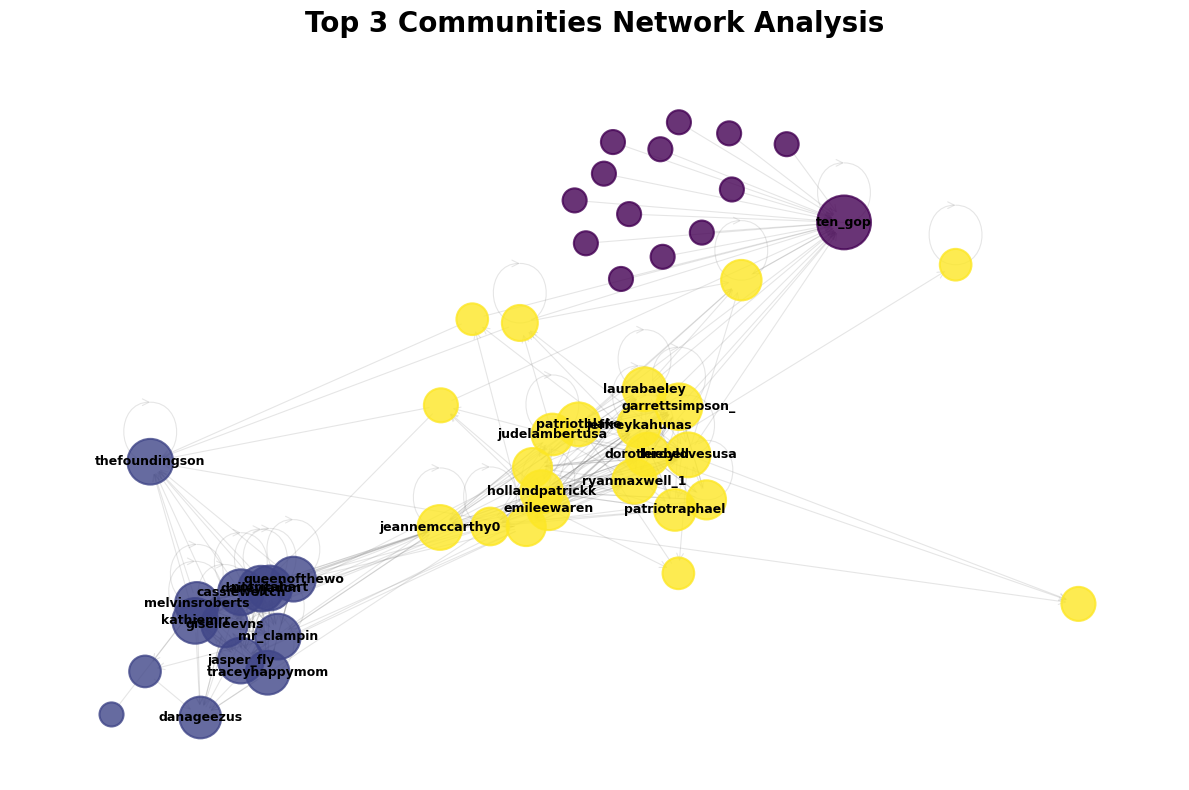

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


user_to_community = dict(zip(merged_df['user_id'], merged_df['community']))
community_counts = Counter(merged_df['community'])
top_3_communities = [com for com, _ in community_counts.most_common(3)]
top_nodes_set = set(merged_df[merged_df['community'].isin(top_3_communities)]['user_id'])


H = G.subgraph([n for n in G.nodes() if n in top_nodes_set]).copy()


degrees = dict(H.in_degree())
node_sizes = [np.sqrt(degrees[n] + 1) * 300 for n in H.nodes()]

community_map = ['green','red','blue']
node_colors = [user_to_community.get(n, -1) for n in H.nodes()]


angles = np.linspace(0, 2 * np.pi, len(top_3_communities), endpoint=False)
community_centers = {com: np.array([10 * np.cos(a), 10 * np.sin(a)]) 
                     for com, a in zip(top_3_communities, angles)}

pos_initial = {}
for n in H.nodes():
    com = user_to_community[n]
    # Środek społeczności + mały losowy szum
    pos_initial[n] = community_centers[com] + np.random.normal(scale=2, size=2)
pos = nx.spring_layout(H, pos=pos_initial, fixed=None, k=8, iterations=40, seed=42)

plt.figure(figsize=(12, 8)) 

# Nodes and edges
nx.draw_networkx_edges(
    H, pos,
    arrowstyle='->', 
    arrowsize=12,
    edge_color='gray',
    alpha=0.2, 
    width=0.8
)

nodes = nx.draw_networkx_nodes(
    H, pos,
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.8,
    linewidths=1.5
)

id_to_name = dict(zip(tweets['user_id'], tweets['user_key']))

for n, (x, y) in pos.items():
    deg = degrees[n]
    if deg > np.percentile(list(degrees.values()), 50): 
        plt.text(
            x, y, 
            id_to_name.get(n, n),
            fontsize=9,
            fontweight='bold',
            ha='center',
            va='center'
        )

plt.title('Top 3 Communities Network Analysis', fontsize=20, fontweight='bold', pad=20)
plt.axis('off')


plt.tight_layout()
plt.show()


In [158]:
#Time analysis
user_to_community

{4272870988.0: 23,
 4224729994.0: 4,
 2532611755.0: 8,
 2496599688.0: 8,
 2533001646.0: 8,
 2541945841.0: 8,
 1727482238.0: 8,
 2589353987.0: 8,
 2882013788.0: 8,
 2584152521.0: 8,
 2572058134.0: 23,
 1623180199.0: 23,
 1671234620.0: 23,
 2587100717.0: 23,
 1833223908.0: 23,
 1676481360.0: 23,
 1657694515.0: 8,
 2671070290.0: 23,
 2533221819.0: 23,
 2531159968.0: 8,
 1660771422.0: 23,
 1868981054.0: 23,
 2540758755.0: 23,
 1646999972.0: 23,
 1658202894.0: 23,
 2882037326.0: 8,
 1656685598.0: 23,
 4508630900.0: 8,
 1694026190.0: 23,
 3084088366.0: 23,
 2590038478.0: 23,
 1651693646.0: 23,
 1649144358.0: 23,
 2514979491.0: 4,
 2491081213.0: 23,
 1882324014.0: 23,
 1669574551.0: 23,
 1659753702.0: 4,
 2586491520.0: 4,
 1621376306.0: 4,
 2534421182.0: 8,
 1720117201.0: 4,
 1654695517.0: 4,
 1678552327.0: 4,
 1623062953.0: 4,
 2559217373.0: 4,
 1688003786.0: 4,
 1532863891.0: 8,
 2563274242.0: 4,
 2388391757.0: 4,
 2528293132.0: 4}

In [160]:
user_ids_community_4 = [user_id for user_id, com in user_to_community.items() if com == 4]
user_ids_community_8 = [user_id for user_id, com in user_to_community.items() if com == 8]
user_ids_community_23 = [user_id for user_id, com in user_to_community.items() if com == 23]


In [165]:
retweets23 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_23)) &
    (retweets['user_id'].isin(user_ids_community_23))
]
retweets8 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_8)) &
    (retweets['user_id'].isin(user_ids_community_8))
]
retweets4 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_4)) &
    (retweets['user_id'].isin(user_ids_community_4))
]

In [ ]:
retweets23

17                 ["NoCyberCensorship"]
18                 ["NoCyberCensorship"]
20                         ["InHonorOf"]
37                                    []
48                         ["InHonorOf"]
                      ...               
2599    ["ThingsMoreTrustedThanHillary"]
2602                                  []
2604                                  []
2620               ["NoCyberCensorship"]
2627                              ["2A"]
Name: hashtags, Length: 306, dtype: object

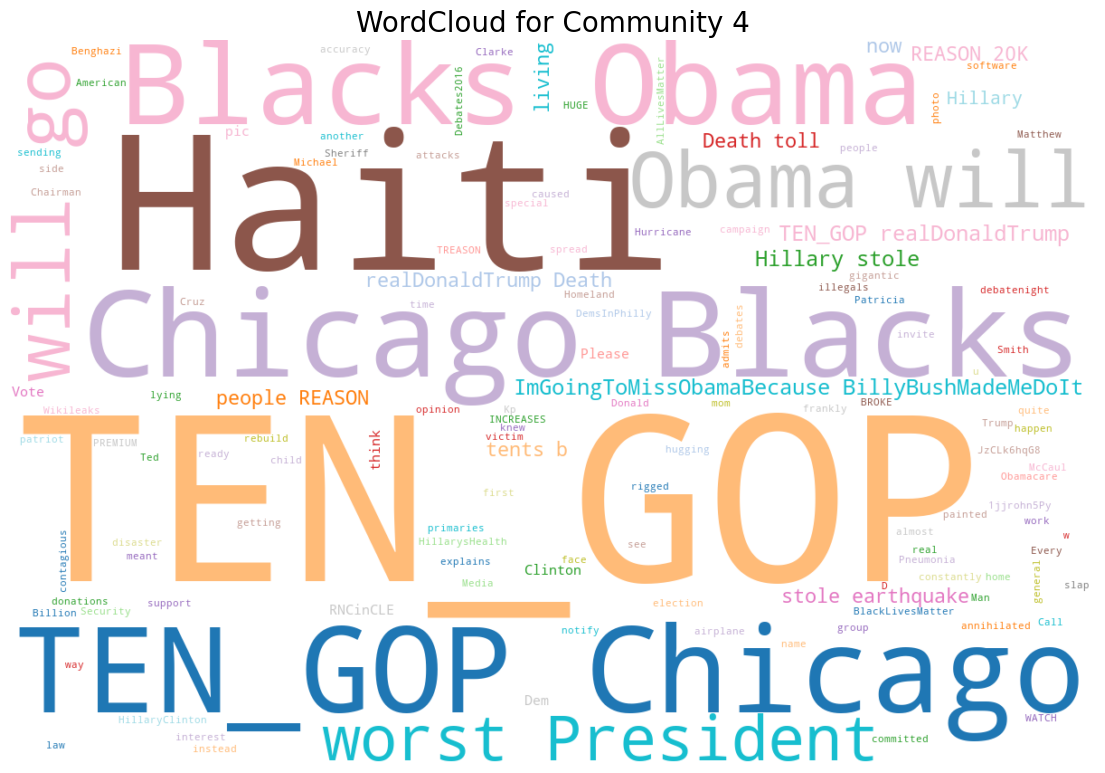

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets4['text'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 4', fontsize=20)
plt.show()


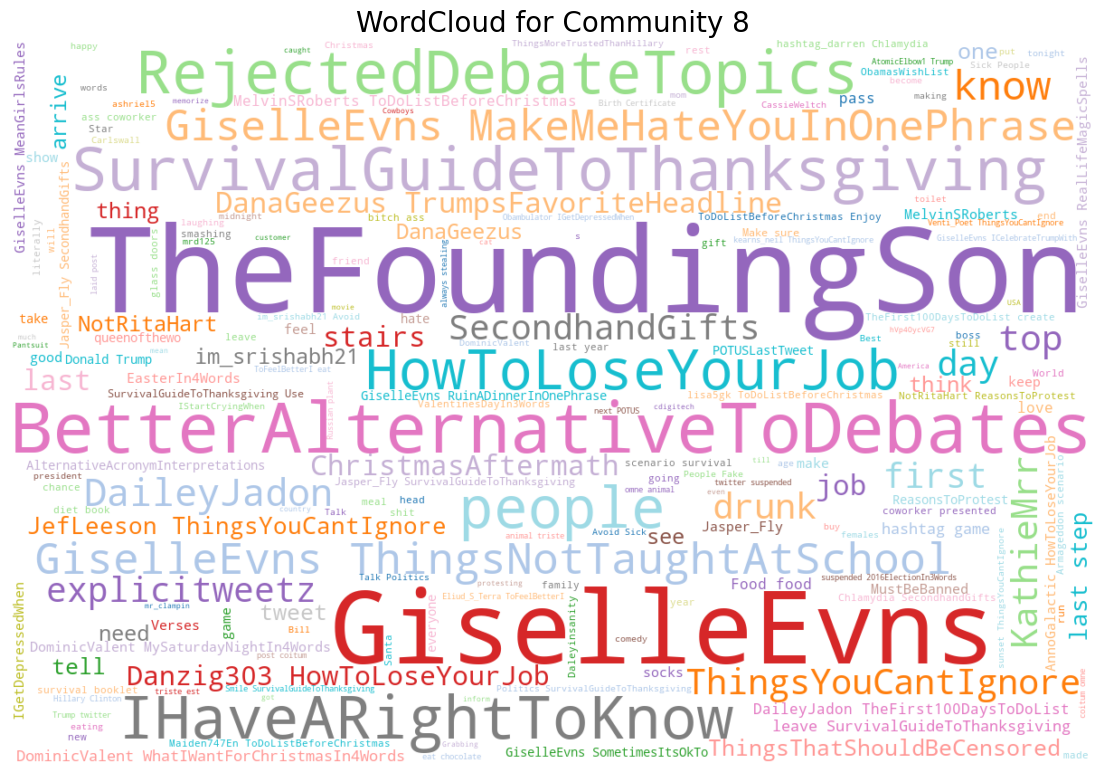

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets8['text'].astype(str))

wordcloud = WordCloud(stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 8', fontsize=20)
plt.show()


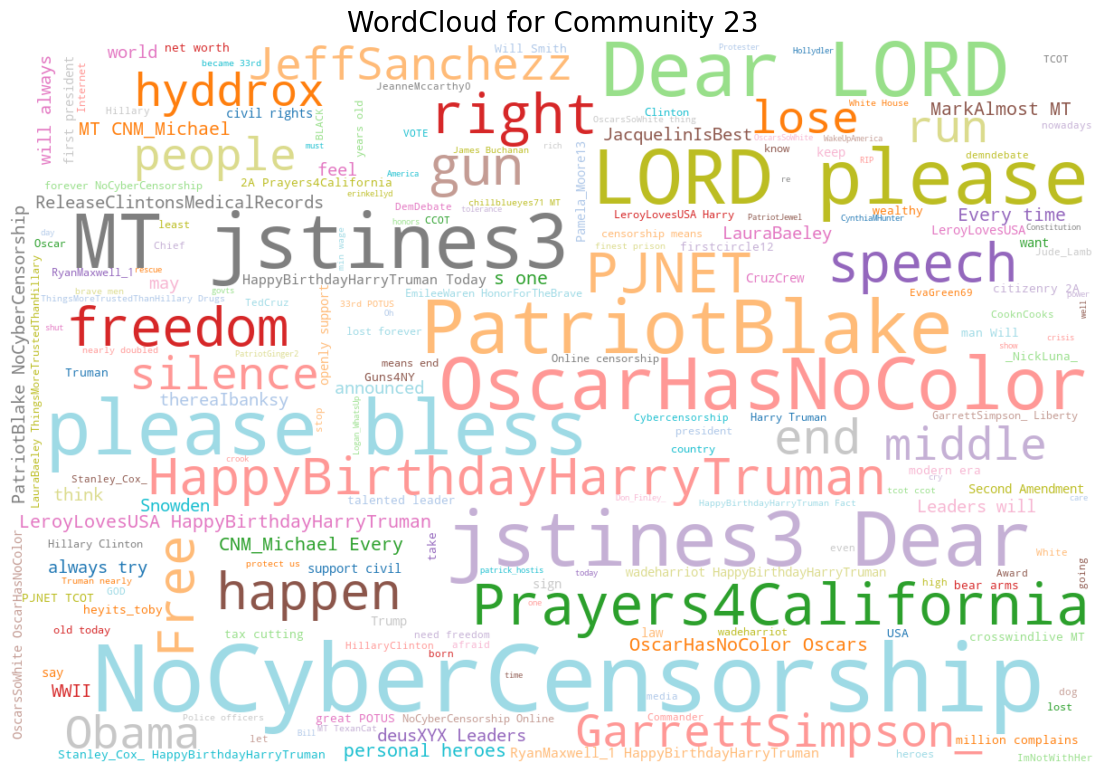

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets23['text'].astype(str))

wordcloud = WordCloud(stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 23', fontsize=20)
plt.show()


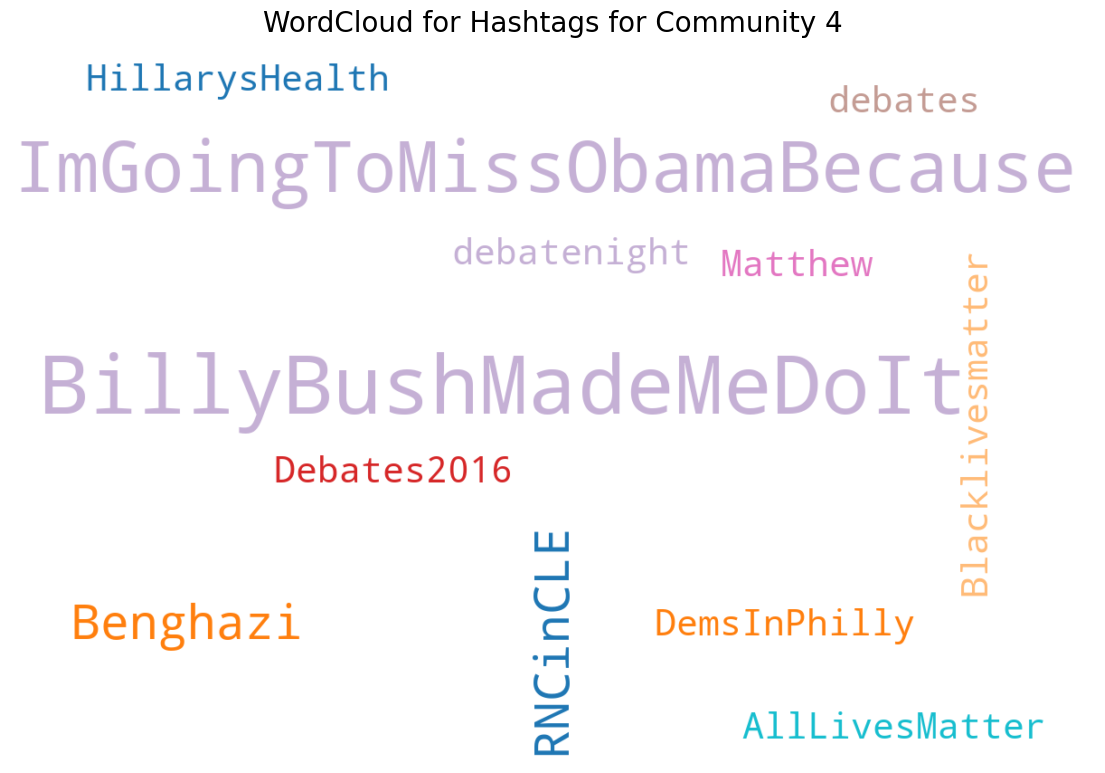

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets4['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 4', fontsize=20)
plt.show()

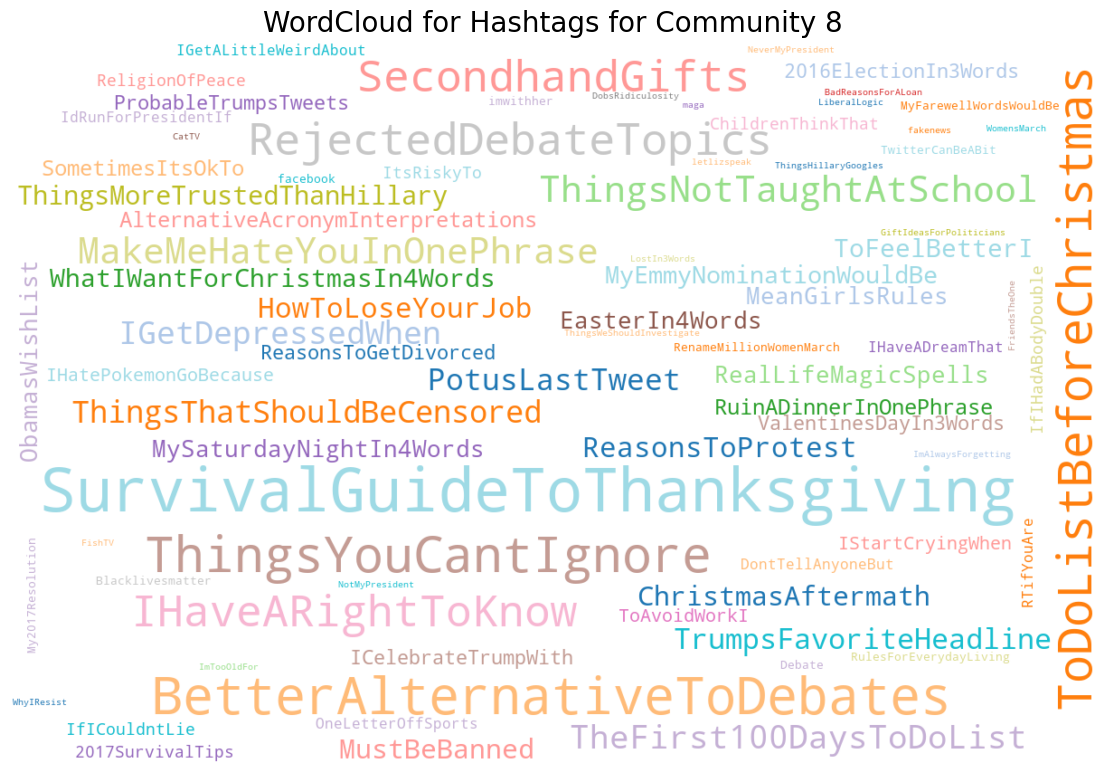

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets8['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 8', fontsize=20)
plt.show()

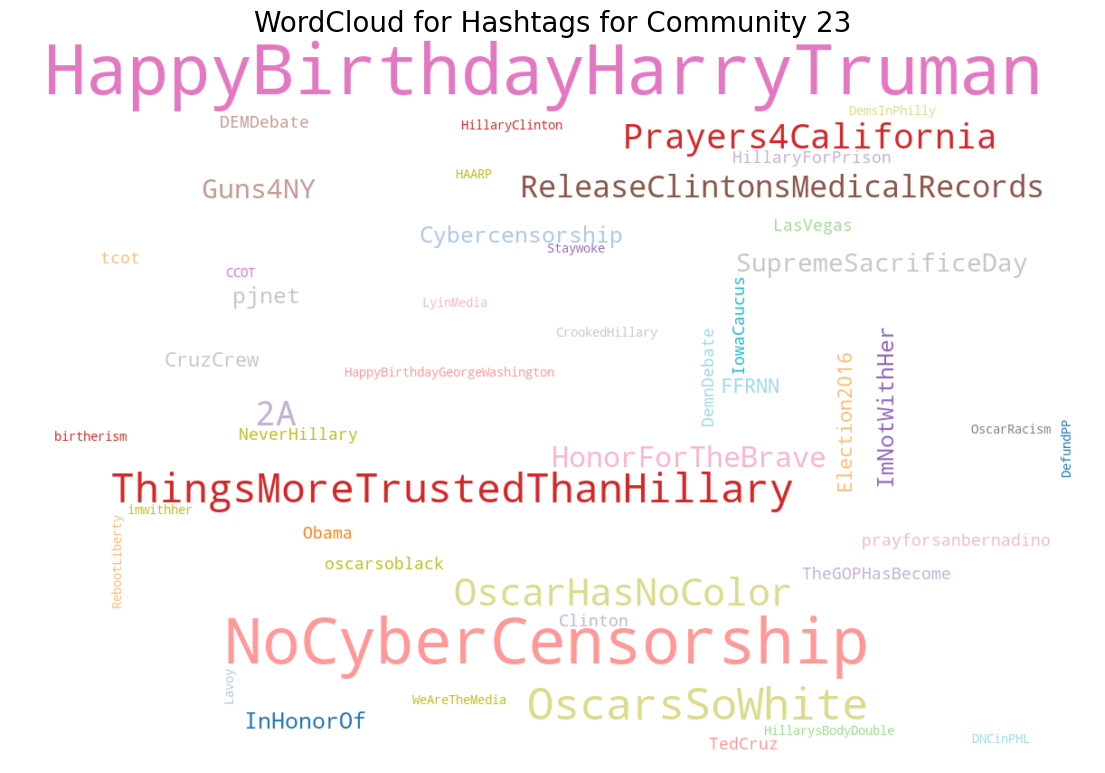

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets23['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 23', fontsize=20)
plt.show()